 Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier

Import the dataset

In [69]:
dataset=pd.read_csv("C:\\Users\\itsme\\OneDrive\\Desktop\\Fake News Detection Dataset.csv")
dataset

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
...,...,...,...,...,...,...
4495,1179,41,7,12,6.963924,0
4496,9445,100,5,15,3.136755,1
4497,4149,100,8,18,3.376823,1
4498,9877,85,14,42,5.331393,0


Checking for missing data

In [64]:
dataset.isna().any().any()

False

Correlation Heatmap


<Axes: >

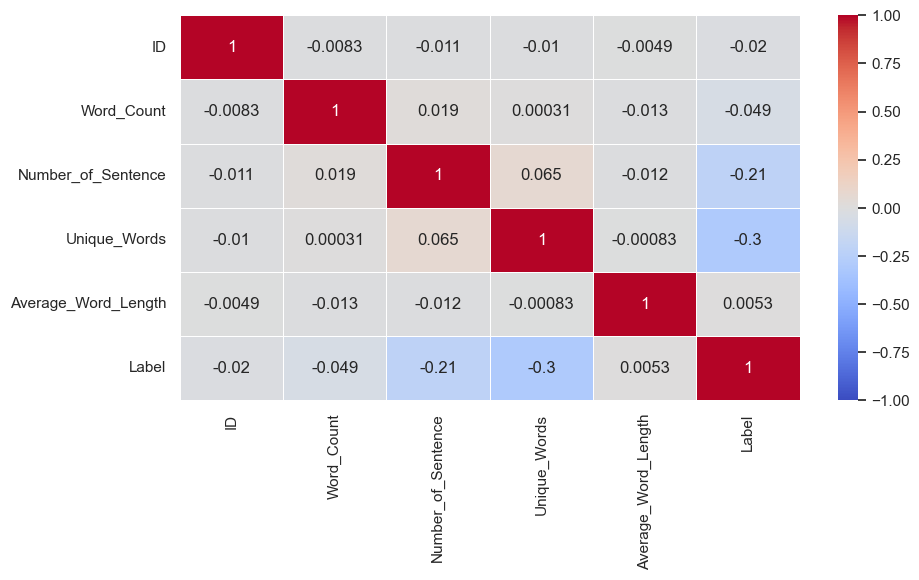

In [65]:
dataset.corr()
sns.set(rc={"figure.figsize":(10,5)}) 
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm",linewidths=0.7,vmin=-1, vmax=1)

ID
0.00441593551447662


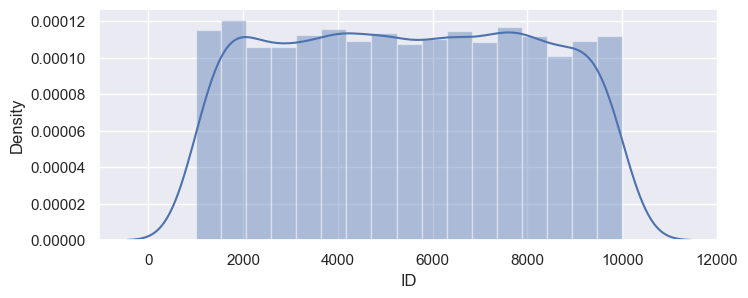

Word_Count
0.10244464892455536


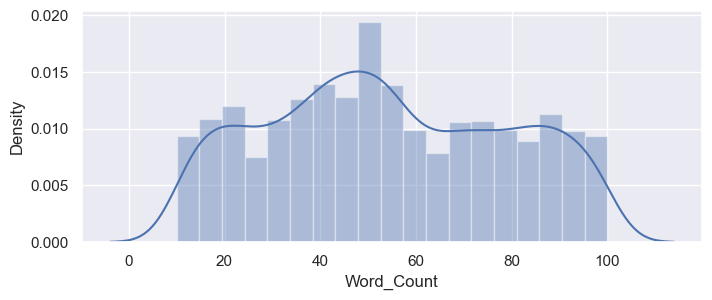

Number_of_Sentence
0.20941827924444853


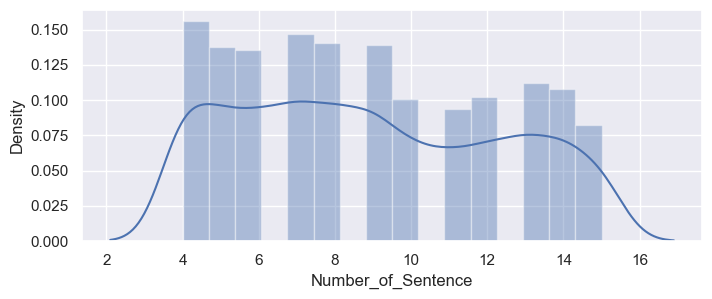

Unique_Words
0.5154649727706184


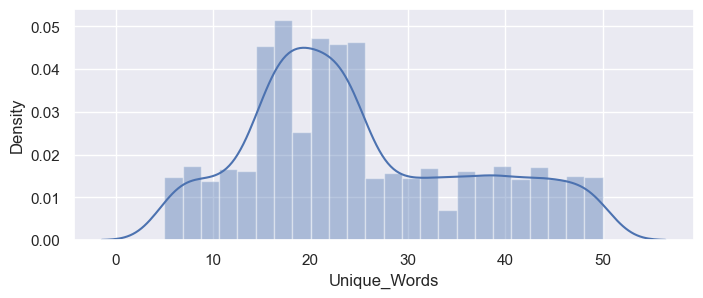

Average_Word_Length
0.05025801653428151


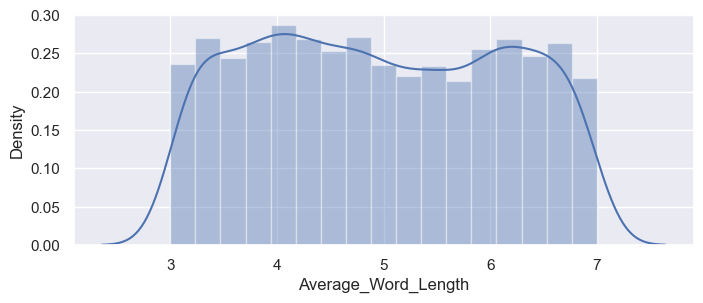

In [66]:
sns.set(rc={"figure.figsize":(8,3)})
from scipy.stats import skew
for col in new_col:
    print(col)
    print(skew(new_col[col]))
    
    plt.figure()
    sns.distplot(new_col[col])
    plt.show()

<Axes: >

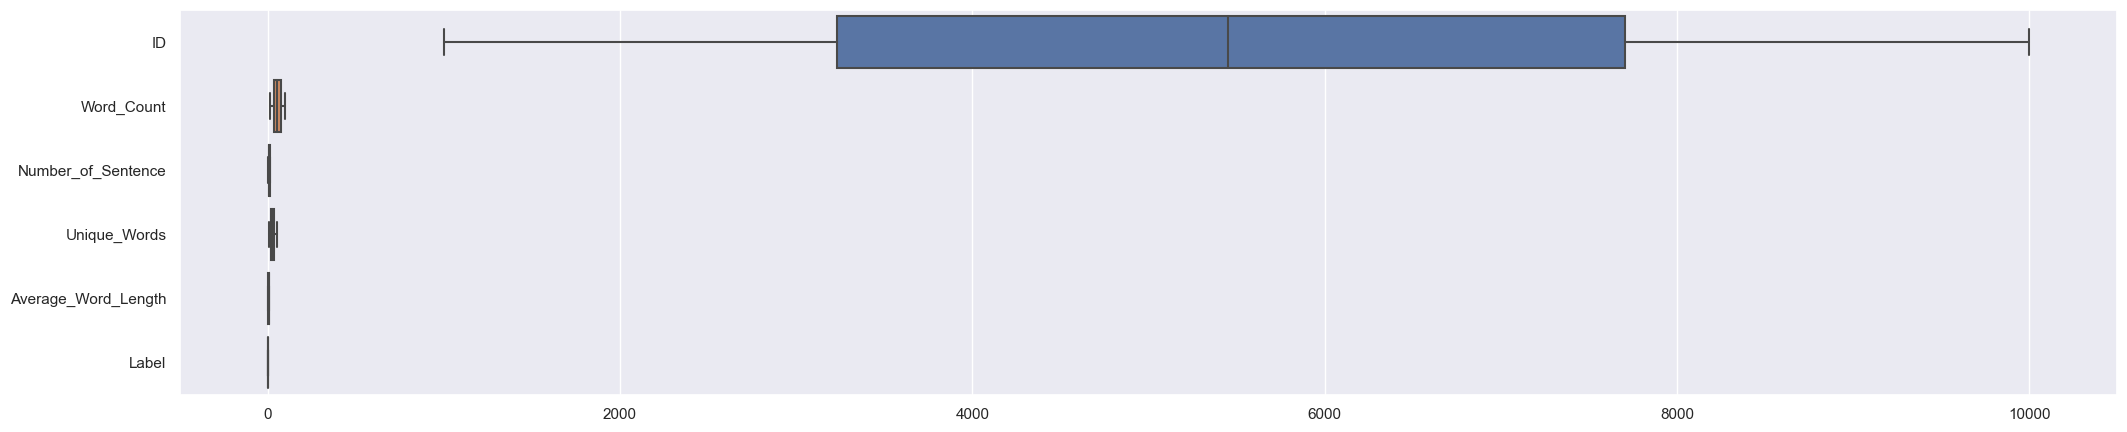

In [72]:
sns.set(rc={"figure.figsize":(25,5)})
sns.boxplot(data=dataset,orient="h")

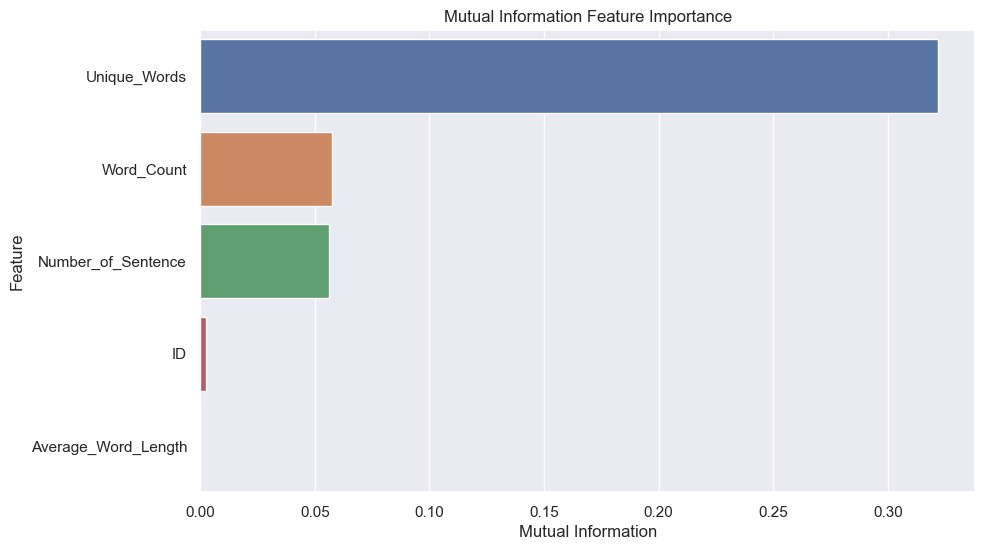

In [75]:
# Prepare the data
X = dataset.drop(columns=['Label'])
y = dataset['Label']

# Calculate Mutual Information (for classification)
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# Visualize Mutual Information Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information Feature Importance')
plt.show()


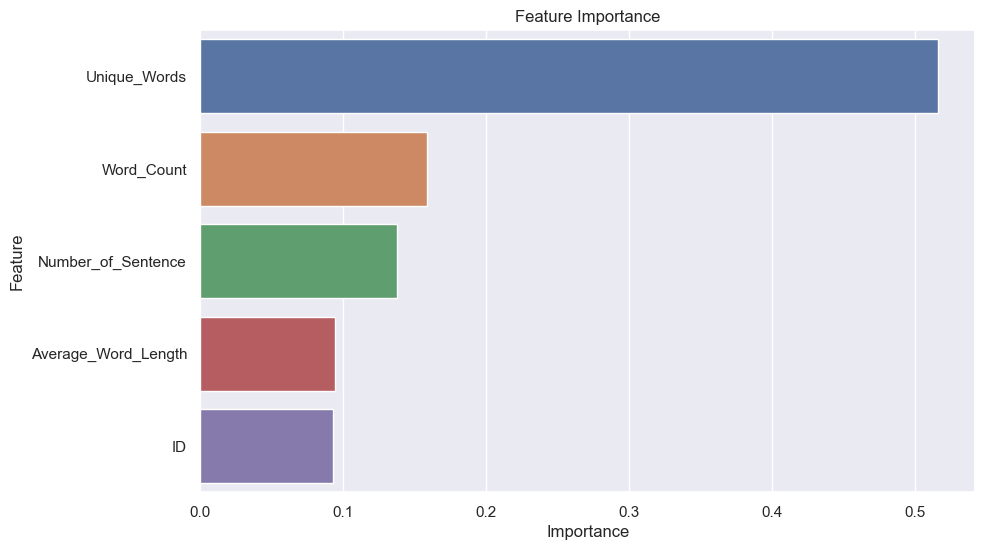

In [68]:
x = dataset.drop(columns=['Label'])
y = dataset['Label']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x, y)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [79]:
new_dataset=dataset.drop(["ID","Average_Word_Length"],axis=1)
new_dataset

,Word_Count,Number_of_Sentence,Unique_Words,Label
0,10,4,24,1
1,10,8,25,1
2,10,7,18,1
3,10,6,18,1
4,10,4,21,1
...,...,...,...,...
4495,41,7,12,0
4496,100,5,15,1
4497,100,8,18,1
4498,85,14,42,0


In [81]:
x=new_dataset.iloc[:,0:-1].values
y=new_dataset.iloc[:,-1].values
print(x)
print(y)

[[ 10   4  24]
 [ 10   8  25]
 [ 10   7  18]
 ...
 [100   8  18]
 [ 85  14  42]
 [ 57   6   7]]
[1 1 1 ... 1 0 0]


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False),[0])],remainder='passthrough')
x= np.array(ct.fit_transform(x))
print(x)

[[ 1.  0.  0. ...  0.  4. 24.]
 [ 1.  0.  0. ...  0.  8. 25.]
 [ 1.  0.  0. ...  0.  7. 18.]
 ...
 [ 0.  0.  0. ...  1.  8. 18.]
 [ 0.  0.  0. ...  0. 14. 42.]
 [ 0.  0.  0. ...  0.  6.  7.]]


In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)


[1 1 1 ... 1 0 0]


In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,:]=sc.fit_transform(x_train[:,:])
x_test[:,:]=sc.transform(x_test[:,:])

In [91]:
print(x_train)
print(x_test)

[[-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -1.16627662e+00  1.12465431e+00]
 [-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -1.10968280e-03  2.07524029e+00]
 [-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -1.16627662e+00 -4.30850006e-01]
 ...
 [-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -2.92401418e-01 -1.71599286e-01]
 [-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -5.83693153e-01  1.23452724e-03]
 [-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
   5.81473787e-01  1.03823741e+00]]
[[-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -1.10968280e-03 -8.62934539e-01]
 [-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -1.45756836e+00 -6.90100726e-01]
 [-7.99360767e-02 -9.29813591e-02 -1.04457766e-01 ... -9.29813591e-02
  -5.83693153e-01 -8.51823794e-02]
 ...
 [-7.99360767e-02 -9.29813591e-02 -1.0445776

In [103]:
def confusion_matrix_evaluation(cm):
    Accuracy = cm[1, 1]+cm[0,0] / (cm[1, 1] + cm[0, 1] + cm[0,0] + cm[1,0]) 
    precision = cm[0, 0] / (cm[0, 0] + cm[0, 1]) 
    recall = cm[0, 0] / (cm[0, 0] + cm[1, 0]) 
    f1 = (2 * precision * recall) / (precision + recall) 
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return precision, recall, f1

    

In [93]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_test,y_pred)

[[724 230]
 [132 264]]


0.7318518518518519

In [105]:
confusion_matrix_evaluation(cm)

Precision: 0.76
Recall: 0.85
F1 Score: 0.80


(0.7589098532494759, 0.8457943925233645, 0.8)

In [106]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.98 %
Standard Deviation: 1.55 %


In [107]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_test,y_pred)

[[791  90]
 [ 65 404]]


0.8851851851851852

In [109]:
confusion_matrix_evaluation(cm)

Precision: 0.90
Recall: 0.92
F1 Score: 0.91


(0.8978433598183881, 0.9240654205607477, 0.9107656879677605)

In [110]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.78 %
Standard Deviation: 1.64 %


In [111]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_test,y_pred)

[[785  74]
 [ 71 420]]


0.8925925925925926

In [137]:
confusion_matrix_evaluation(cm)

Precision: 0.75
Recall: 0.73
F1 Score: 0.74


(0.7545126353790613, 0.7324766355140186, 0.7433313574392413)

In [116]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.16 %
Standard Deviation: 1.72 %


In [127]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()             
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [128]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[706 103]
 [150 391]]


0.8125925925925926

In [129]:

accuracies= cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.21 %
Standard Deviation: 1.36 %


In [133]:
confusion_matrix_evaluation(cm)

Precision: 0.75
Recall: 0.86
F1 Score: 0.80


(0.7533265097236438, 0.8598130841121495, 0.8030551009274414)

In [131]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)       
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [132]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[736 241]
 [120 253]]


0.7325925925925926

In [122]:
confusion_matrix_evaluation(cm)
accuracies= cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Precision: 0.75
Recall: 0.86
F1 Score: 0.80
Accuracy: 74.76 %
Standard Deviation: 1.58 %


In [134]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [135]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[627 204]
 [229 290]]


0.6792592592592592

In [136]:
confusion_matrix_evaluation(cm)
accuracies= cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Precision: 0.75
Recall: 0.73
F1 Score: 0.74
Accuracy: 66.25 %
Standard Deviation: 1.70 %


In [142]:

Score={"Classifier":["Logistic","Decision Tree","Random Forest","KNN","SVM","Naive Bayes"],
       "Precision(Sensitivity)":[75.89,89.78,91.38,87.26,75.33,75.45],
       "Recall(Specificity)":[84.57,92.40,91.70,82.47,85.98,73.24],
       "F1-Score":[80,91.07,91.54,84.80,80.30,74.33],
       "Accuracy_Score(%)":[74.98,87.78,88.16,81.21,74.76,66.25],
       "Standard_Deviation(%)":[1.55,1.64,1.72,1.36,1.58,1.70]}


In [143]:
Accuracy_Score=pd.DataFrame(Score)
Accuracy_Score

,Classifier,Precision(Sensitivity),Recall(Specificity),F1-Score,Accuracy_Score(%),Standard_Deviation(%)
0,Logistic,75.89,84.57,80.00,74.98,1.55
1,Decision Tree,89.78,92.40,91.07,87.78,1.64
2,Random Forest,91.38,91.70,91.54,88.16,1.72
3,KNN,87.26,82.47,84.80,81.21,1.36
4,SVM,75.33,85.98,80.30,74.76,1.58
5,Naive Bayes,75.45,73.24,74.33,66.25,1.70


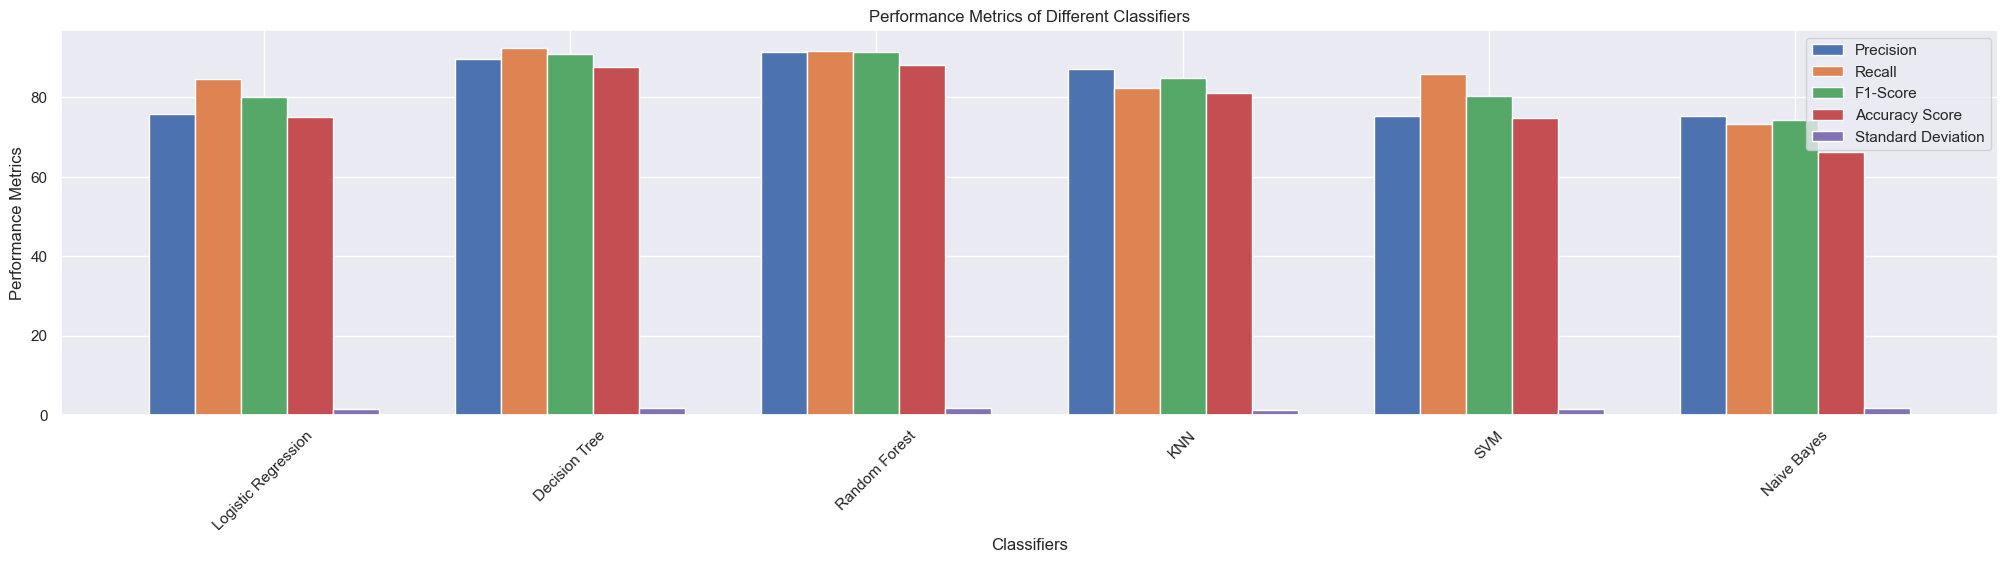

<Figure size 500x5000 with 0 Axes>

In [147]:
# Classifier names
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes']

# Performance metrics
precision = [75.89, 89.78, 91.38, 87.26, 75.33, 75.45]
recall = [84.57, 92.40, 91.70, 82.47, 85.98, 73.24]
f1_score = [80.00, 91.07, 91.54, 84.80, 80.30, 74.33]
accuracy_score = [74.98, 87.78, 88.16, 81.21, 74.76, 66.25]
standard_deviation = [1.55, 1.64, 1.72, 1.36, 1.58, 1.70]

# Width of each bar
bar_width = 0.15
index = np.arange(len(classifiers))

# Plotting the grouped bar graph
plt.bar(index - 2*bar_width, precision, bar_width, label='Precision')
plt.bar(index - bar_width, recall, bar_width, label='Recall')
plt.bar(index, f1_score, bar_width, label='F1-Score')
plt.bar(index + bar_width, accuracy_score, bar_width, label='Accuracy Score')
plt.bar(index + 2*bar_width, standard_deviation, bar_width, label='Standard Deviation')

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics of Different Classifiers')
plt.xticks(index, classifiers, rotation=45)
plt.legend()

# Displaying the graph
plt.figure(figsize=(5,50))
plt.tight_layout()
plt.show()
